## Reading the data

In [76]:
import sys
sys.path.append('../scripts')  # Appending the path to access the scripts folder
from functions1 import * 

In [77]:
query = "SELECT * FROM xdr_data;"  # Adjust the table name as needed
df = fetch_data_from_db('telecom', 'postgres', 'root', 'localhost', query)
    
    
display(df.head())


c:\Users\Toshiba\Documents\Kifiya\week 2\notebooks\../scripts\functions1.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [78]:
display(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


## Data Cleaning

In [79]:
df = clean_data(df)
print("Shape of cleaned DataFrame:", df.shape)


Found 0 rows with invalid data (negative values)
Data cleaning completed. Cleaned data is ready for analysis.
Shape of cleaned DataFrame: (53779, 55)


## Overview

Top 10 Handsets Used by Customers:


,handset_model,usage_count
0,Apple iPhone 6S (A1688),5671
1,Apple iPhone 6 (A1586),5175
2,Apple iPhone 7 (A1778),3420
3,Apple iPhone Se (A1723),3263
4,Apple iPhone 8 (A1905),2876
5,Apple iPhone Xr (A2105),2480
6,Samsung Galaxy S8 (Sm-G950F),2182
7,Apple iPhone X (A1901),2094
8,Samsung Galaxy A5 Sm-A520F,2059
9,Samsung Galaxy J3 (Sm-J330),1956


Top 3 Handset Manufacturers:


,manufacturer,usage_count
0,Apple,33402
1,Samsung,19544
2,Sony Mobile Communications Ab,249


Top 5 Handsets per Top 3 Manufacturers:


,manufacturer,handset_model,usage_count
0,Apple,Apple iPhone 6S (A1688),5671
1,Apple,Apple iPhone 6 (A1586),5175
2,Apple,Apple iPhone 7 (A1778),3420
3,Apple,Apple iPhone Se (A1723),3263
4,Apple,Apple iPhone 8 (A1905),2876
5,Samsung,Samsung Galaxy S8 (Sm-G950F),2182
6,Samsung,Samsung Galaxy A5 Sm-A520F,2059
7,Samsung,Samsung Galaxy J3 (Sm-J330),1956
8,Samsung,Samsung Galaxy J5 (Sm-J530),1719
9,Samsung,Samsung Galaxy S7 (Sm-G930X),1622


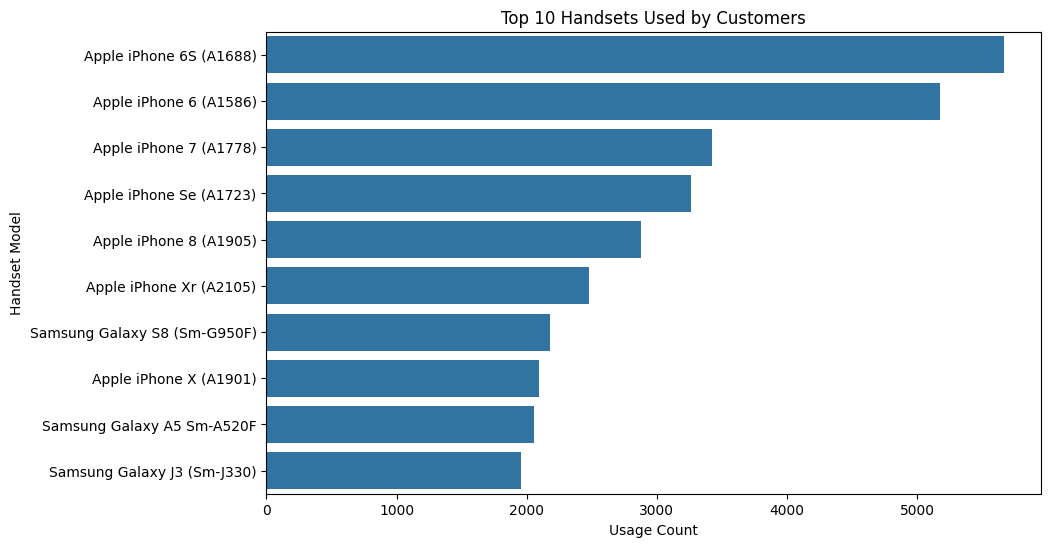

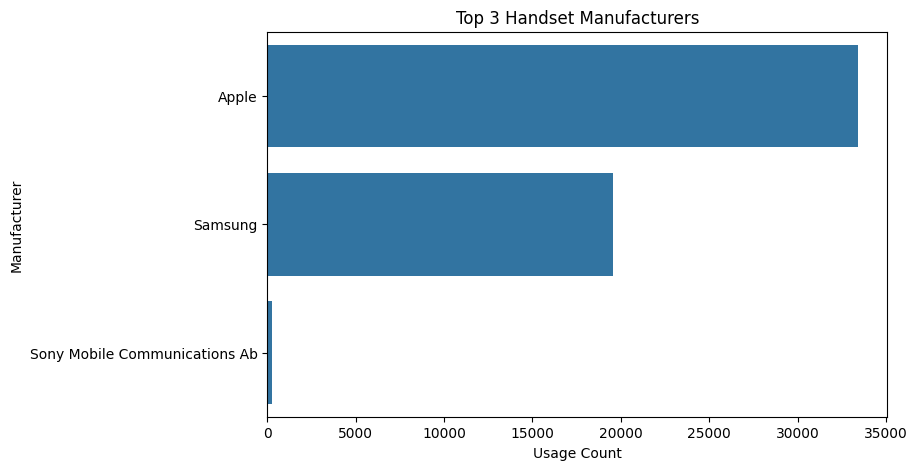

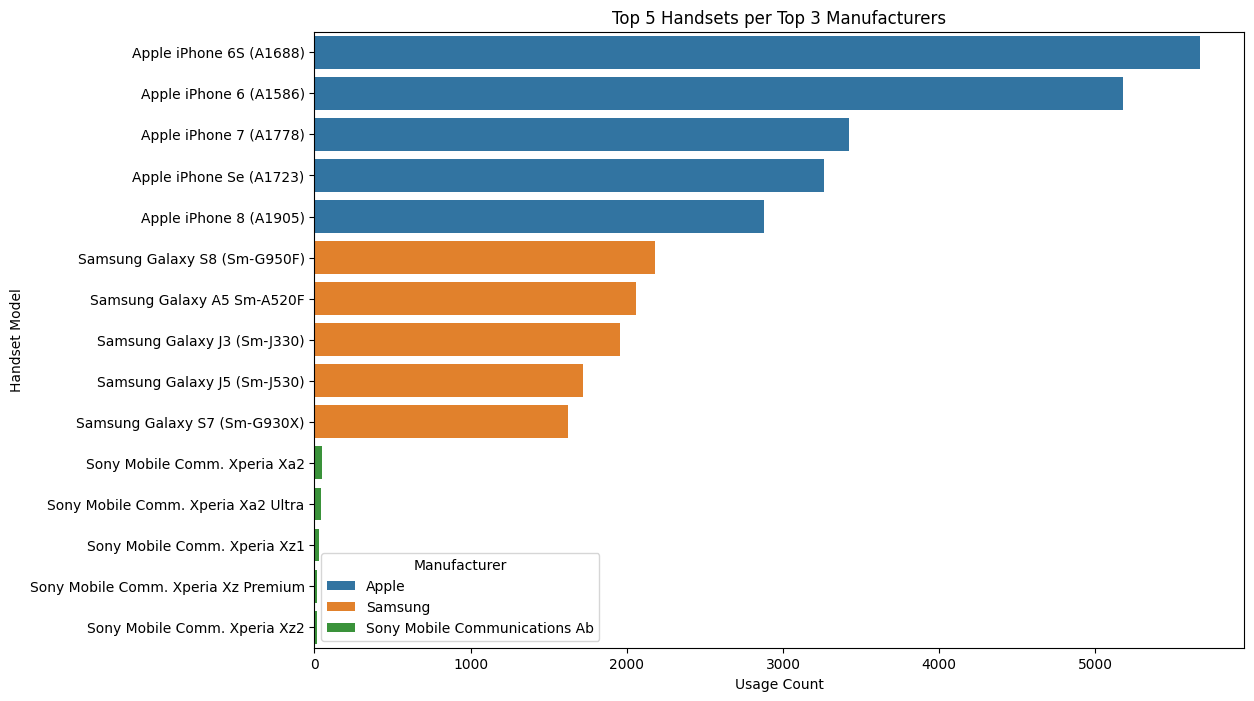

In [80]:
def top_5_handsets_per_manufacturer(df, top_manufacturers):
    """
    Get the top 5 handsets for each of the top 3 manufacturers.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame containing handset data.
    top_manufacturers (list): List of top manufacturer names.
    
    Returns:
    pd.DataFrame: DataFrame with top handsets per manufacturer and their usage counts.
    """
    filtered_df = df[df['Handset Manufacturer'].isin(top_manufacturers)]
    
    top_5_handsets_per_manufacturer = (
        filtered_df.groupby(['Handset Manufacturer', 'Handset Type'])['IMEI'].count()
        .groupby(level=0, group_keys=False)
        .nlargest(5).reset_index()
    )
    top_5_handsets_per_manufacturer.columns = ['manufacturer', 'handset_model', 'usage_count']
    print("Top 5 Handsets per Top 3 Manufacturers:")
    display(top_5_handsets_per_manufacturer)
    return top_5_handsets_per_manufacturer

# Example usage
top_handsets = top_handsets_used(df)
top_manufacturers = top_handset_manufacturers(df)
top_3_manufacturers = top_manufacturers['manufacturer'].tolist()

top_5_handsets_per_manufacturer= top_5_handsets_per_manufacturer(df, top_3_manufacturers)

    
    # Visualize the results
visualize_results(top_handsets, top_manufacturers, top_5_handsets_per_manufacturer)


### User Behavior on Applications

In [81]:

app_behavior = user_behavior_on_applications(df)

User Behavior on Applications:


,IMEI,total_sessions,total_session_duration,total_download,total_upload
0,3.515121e+13,1,86409.0,240534941.0,36209326.0
1,3.515121e+13,1,30213.0,601263133.0,37960992.0
2,3.515121e+13,1,65020.0,625236085.0,42908236.0
3,3.515121e+13,1,32550.0,657835667.0,23456291.0
4,3.515121e+13,1,86399.0,678653437.0,46506201.0


## exploratory data analysis 

<class 'pandas.core.frame.DataFrame'>
Index: 53779 entries, 85 to 140440
Data columns (total 55 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Bearer Id                                 53779 non-null  float64
 1   Start                                     53779 non-null  object 
 2   Start ms                                  53779 non-null  float64
 3   End                                       53779 non-null  object 
 4   End ms                                    53779 non-null  float64
 5   Dur. (ms)                                 53779 non-null  float64
 6   IMSI                                      53779 non-null  float64
 7   MSISDN/Number                             53779 non-null  float64
 8   IMEI                                      53779 non-null  float64
 9   Last Location Name                        53779 non-null  object 
 10  Avg RTT DL (ms)                      

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

Descriptive Statistics:


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,5.377900e+04,53779.000000,53779.000000,53779.000000,5.377900e+04,5.377900e+04,5.377900e+04,53779.000000,53779.000000,53779.000000,...,5.377900e+04,5.377900e+04,5.377900e+04,5.377900e+04,5.377900e+04,5.377900e+04,5.377900e+04,5.377900e+04,5.377900e+04,5.377900e+04
mean,9.892457e+18,499.487402,497.994217,110208.802414,2.082014e+14,3.365625e+10,3.559950e+13,61.560419,8.029527,86.479797,...,1.159971e+07,1.101918e+07,1.161074e+07,1.097565e+07,4.213834e+08,8.268619e+06,4.199722e+08,8.272070e+06,4.108746e+07,4.539349e+08
std,2.865711e+18,288.061727,287.454030,54994.801453,4.792385e+08,2.372508e+07,2.293282e+11,37.089654,7.213291,203.903325,...,6.708452e+06,6.334448e+06,6.720615e+06,6.350118e+06,2.443575e+08,4.782198e+06,2.433347e+08,4.760887e+06,1.118143e+07,2.445059e+08
min,6.917538e+18,0.000000,0.000000,7293.000000,2.082001e+14,3.360250e+10,3.515121e+13,0.000000,0.000000,0.000000,...,5.300000e+01,4.030000e+02,4.200000e+01,2.260000e+02,2.516000e+03,1.130000e+02,1.432000e+04,1.480000e+02,9.466550e+06,9.046209e+06
25%,7.349883e+18,251.000000,252.000000,72173.500000,2.082010e+14,3.364345e+10,3.540531e+13,29.000000,2.000000,33.000000,...,5.789598e+06,5.549082e+06,5.777384e+06,5.457758e+06,2.094952e+08,4.104805e+06,2.092812e+08,4.165287e+06,3.317223e+07,2.421711e+08
50%,7.349883e+18,498.000000,500.000000,103867.000000,2.082015e+14,3.366141e+10,3.560871e+13,45.000000,5.000000,45.000000,...,1.155921e+07,1.101983e+07,1.165205e+07,1.095791e+07,4.224221e+08,8.273673e+06,4.207860e+08,8.285967e+06,4.114626e+07,4.550328e+08
75%,1.311448e+19,748.000000,751.000000,150139.500000,2.082017e+14,3.366816e+10,3.576611e+13,108.680865,17.615285,59.000000,...,1.738994e+07,1.651179e+07,1.743071e+07,1.647124e+07,6.334626e+08,1.240579e+07,6.302854e+08,1.238471e+07,4.895130e+07,6.663229e+08
max,1.318654e+19,999.000000,999.000000,252919.000000,2.082022e+14,3.370000e+10,3.599921e+13,220.000000,39.000000,2092.000000,...,2.325881e+07,2.201196e+07,2.325815e+07,2.201175e+07,8.434260e+08,1.655868e+07,8.434227e+08,1.655882e+07,7.271475e+07,8.995022e+08


Total data per decile class:


c:\Users\Toshiba\Documents\Kifiya\week 2\notebooks\../scripts\functions1.py:265: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decile_data = df.groupby('Decile_Class')['Total_Data'].sum().reset_index()


,Decile_Class,Total_Data
0,1,5.305804e+12
1,2,5.330302e+12
2,3,5.329471e+12
3,4,5.318196e+12
4,5,5.338033e+12



Basic Metrics:


,Total_Session_Duration,Total DL (Bytes),Total UL (Bytes)
count,53779.000000,5.377900e+04,5.377900e+04
mean,110208.802414,4.539349e+08,4.108746e+07
std,54994.801453,2.445059e+08,1.118143e+07
min,7293.000000,9.046209e+06,9.466550e+06
25%,72173.500000,2.421711e+08,3.317223e+07
50%,103867.000000,4.550328e+08,4.114626e+07
75%,150139.500000,6.663229e+08,4.895130e+07
max,252919.000000,8.995022e+08,7.271475e+07



Dispersion Metrics:


,Variance,Standard Deviation,Range (Max - Min)
Total_Session_Duration,3.024428e+09,5.499480e+04,245626.0
Total DL (Bytes),5.978315e+16,2.445059e+08,890455975.0
Total UL (Bytes),1.250243e+14,1.118143e+07,63248202.0


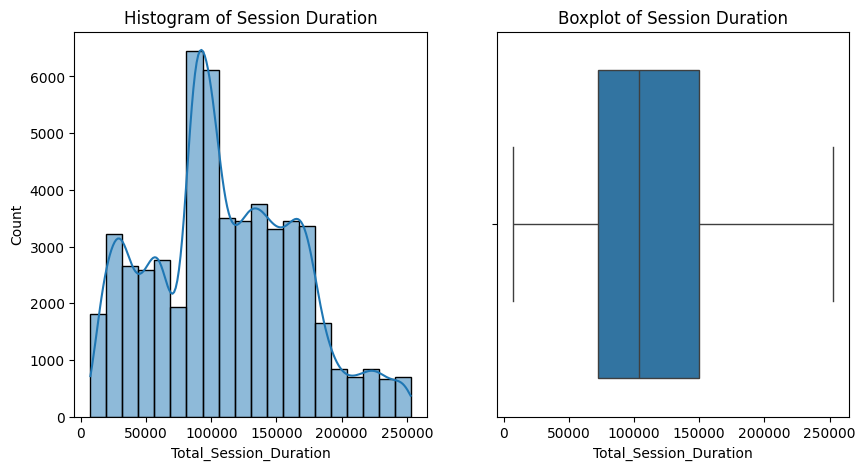

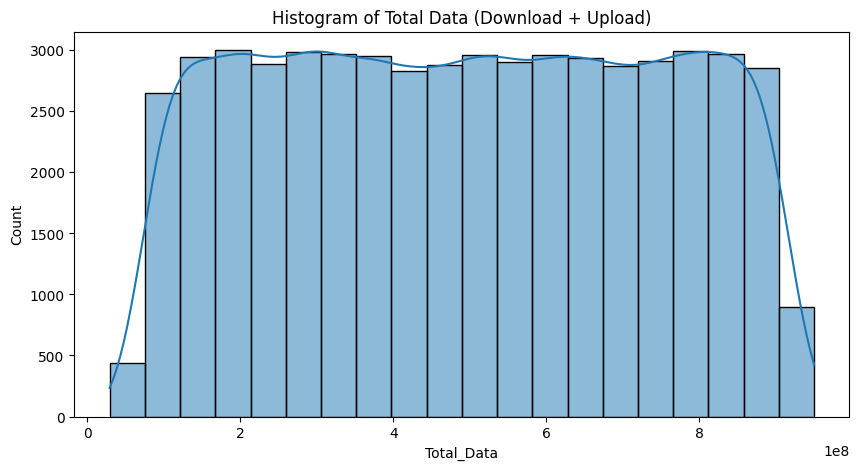

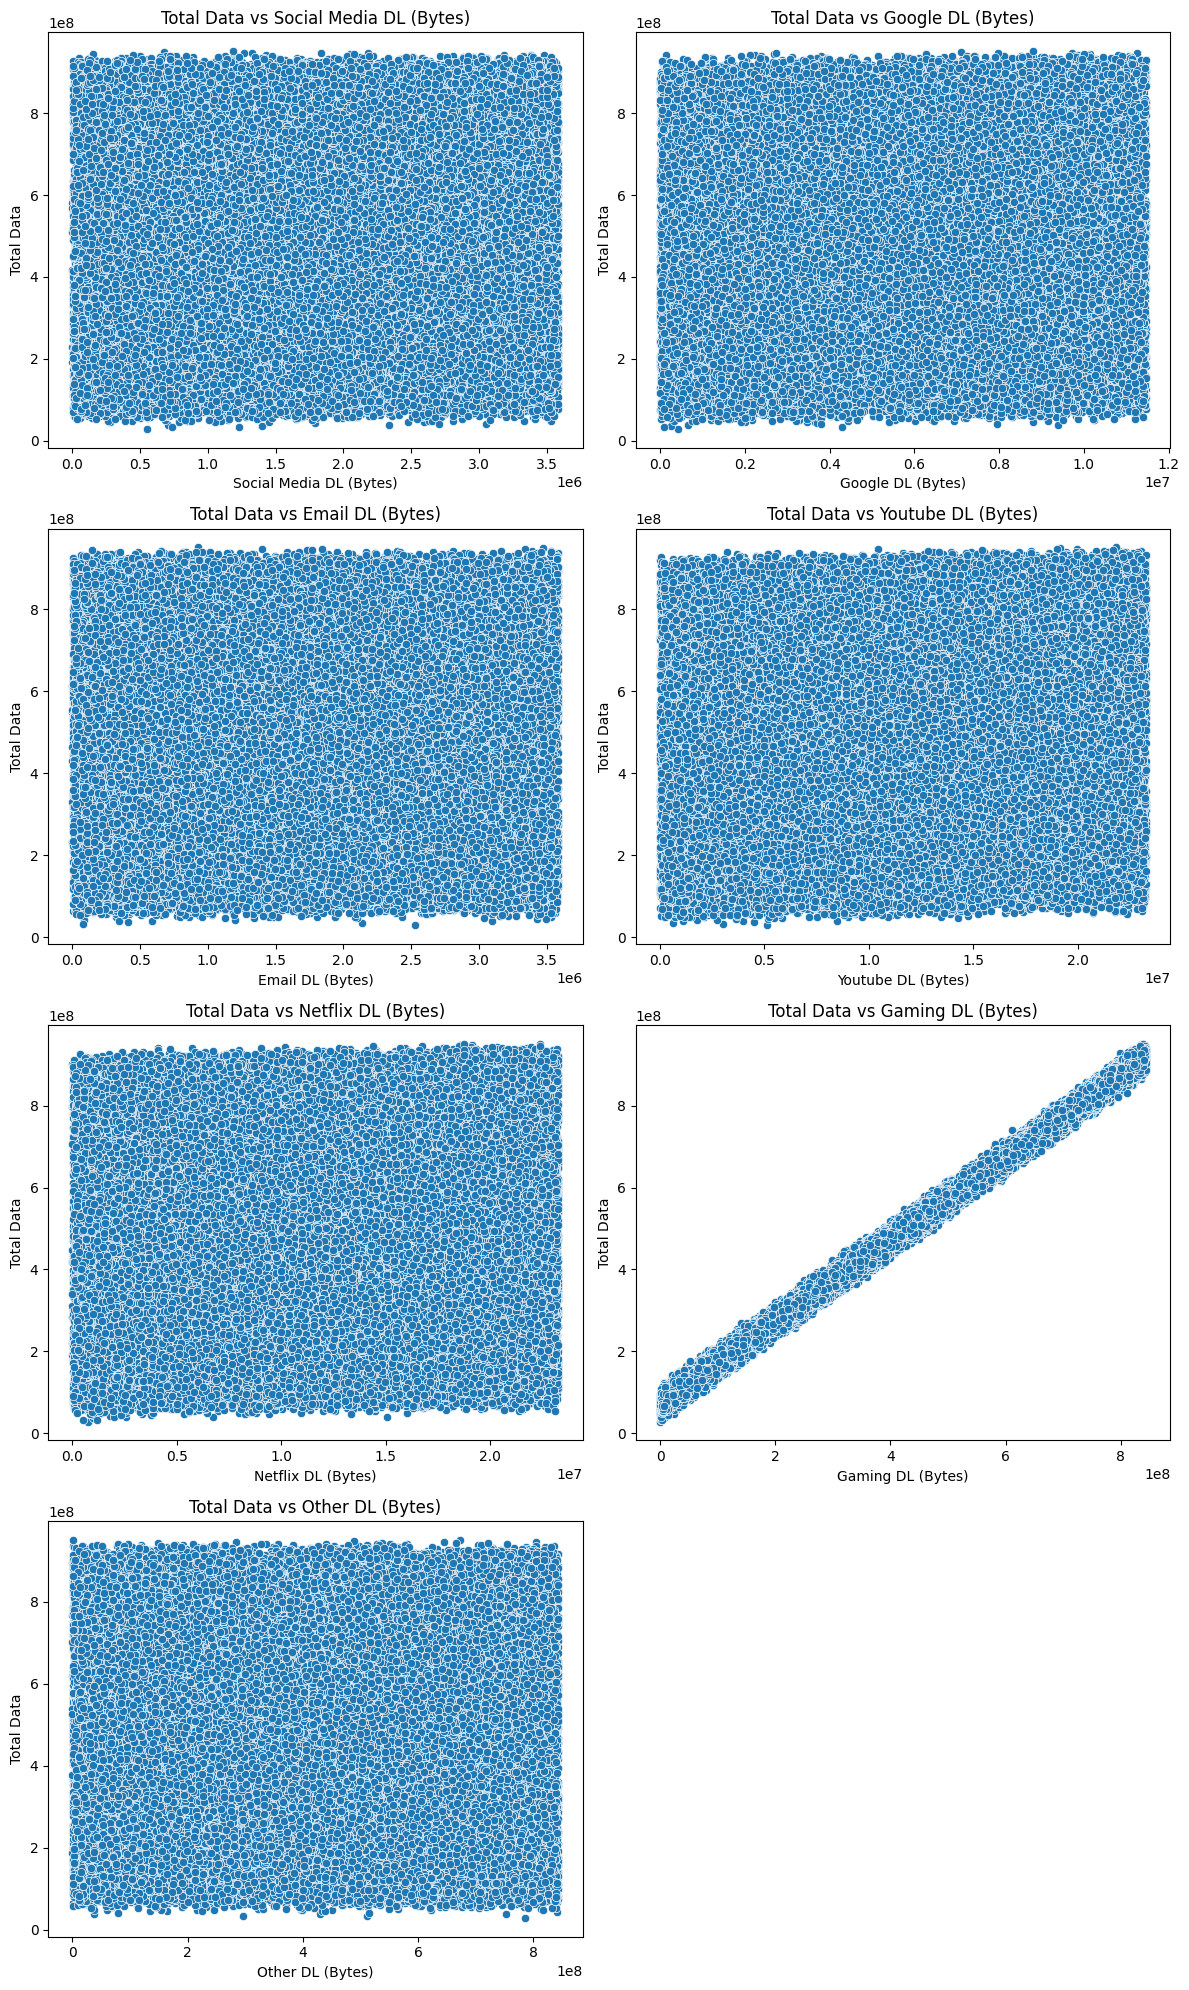


Correlation Matrix:


,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes)
Social Media DL (Bytes),1.000000,-0.004240,0.004609,-0.005343,-0.004910,-0.002878,0.001553
Google DL (Bytes),-0.004240,1.000000,-0.003597,0.006438,0.007146,-0.005884,-0.005349
Email DL (Bytes),0.004609,-0.003597,1.000000,0.001970,-0.007043,0.004442,0.000699
Youtube DL (Bytes),-0.005343,0.006438,0.001970,1.000000,0.001592,-0.002966,-0.000051
Netflix DL (Bytes),-0.004910,0.007146,-0.007043,0.001592,1.000000,-0.003878,-0.008302
Gaming DL (Bytes),-0.002878,-0.005884,0.004442,-0.002966,-0.003878,1.000000,-0.001514
Other DL (Bytes),0.001553,-0.005349,0.000699,-0.000051,-0.008302,-0.001514,1.000000


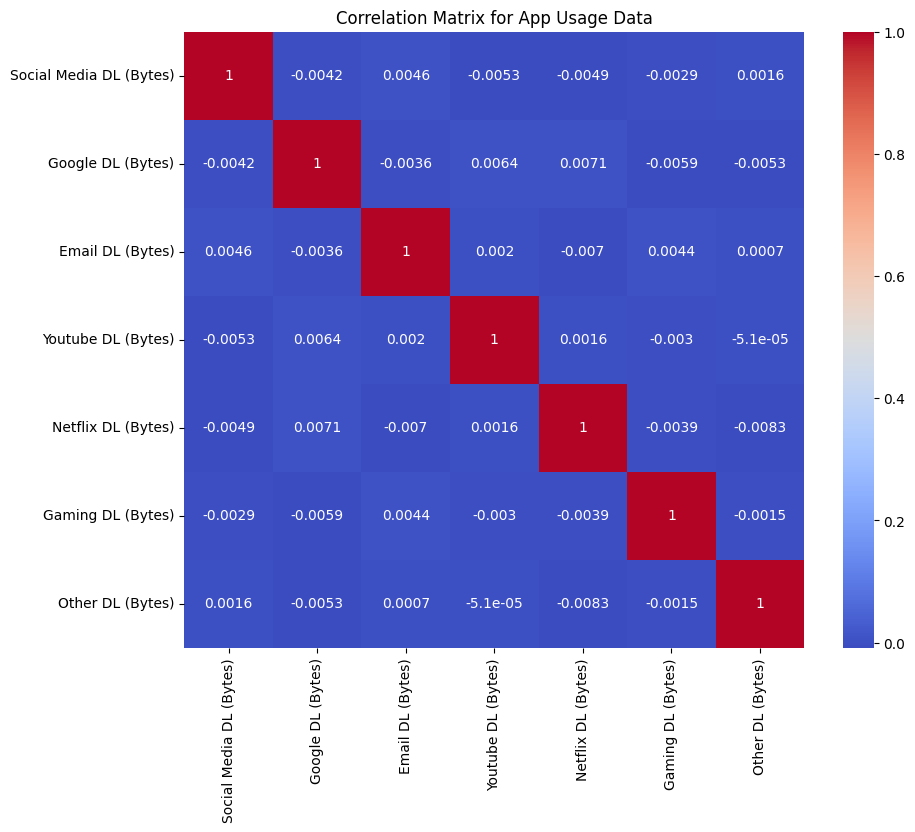

Explained Variance Ratio by PCA Components:


,Explained Variance
0,0.146086
1,0.143467


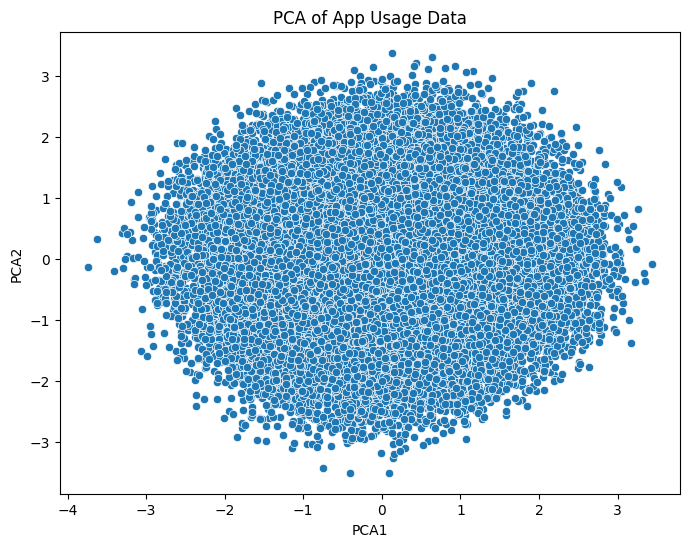

In [82]:

# Execute the analysis
describe_variables(df)
transform_variables(df)
basic_metrics(df)
dispersion_analysis(df)
univariate_analysis(df)

# Define app_columns for further analysis
app_columns = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
               'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

bivariate_analysis(df, app_columns)
correlation_analysis(df, app_columns)
pca_analysis(df, app_columns)
